In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation : str
    finalNum : int

In [7]:
def adder(state: AgentState) -> AgentState:
    """This node adds the two numbers"""

    state['finalNum'] = state['num1'] + state['num2']

    return state

def substractor(state : AgentState) -> AgentState:
    """This node substracts the two numbers"""

    state['finalNum'] = state['num1'] - state['num2']

    return state


def decide_next_node(state : AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] == "+":
        return "addition_operation"

    elif state["operation"] == "-":
        return "substraction_operation"
        


In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("substract_node",substractor)
graph.add_node("router",lambda state:state) # passthrough function input -> output => same

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge : Node
        "addition_operation" : "add_node",
        "substraction_operation" : "substract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()





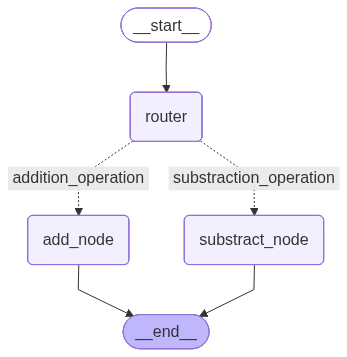

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke(
    {
        "num1" : 12,
        "num2" : 3,
        "operation" : "-"
    }
)

In [15]:
print(result)


{'num1': 12, 'num2': 3, 'operation': '-', 'finalNum': 9}


In [17]:
# One more method to invoke the agent
initial_state_1 = AgentState(num1= 12, num2= 4, operation="+")
print(app.invoke(initial_state_1))

{'num1': 12, 'num2': 4, 'operation': '+', 'finalNum': 16}
